# **Importing the Dataset From the Kaggle**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("georgejdinicola/world-bank-indicators")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-bank-indicators


# **Import the Liraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# **Load the Dataset**

In [ ]:
# load the dataset
file_path = '/kaggle/input/world-bank-indicators/world_bank_indicators.csv'  # Adjust this path if necessary
df = pd.read_csv(file_path)


# **Display the first few rows**

In [ ]:
print(df.head())

   year country               updated_at  \
0  1960     abw  2025-04-03 02:52:37 UTC   
1  1960     afe  2025-04-03 02:52:37 UTC   
2  1960     afg  2025-04-03 02:52:37 UTC   
3  1960     afw  2025-04-03 02:52:37 UTC   
4  1960     ago  2025-04-03 02:52:37 UTC   

   Access to electricity (% of population)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   Adjusted net savings, including particulate emission damage (% of GNI)  \
0                                                NaN                        
1                                                NaN                        
2                                                NaN                        
3                                                NaN                        
4                                                NaN                     

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# **Check the column names of the dataset**

In [ ]:
# Check the column names of the dataset
print(df.columns)


Index(['year', 'country', 'updated_at',
       'Access to electricity (% of population)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       ...
       'Time required to get electricity (days)',
       'Time required to start a business (days)',
       'Total debt service (% of exports of goods, services and primary income)',
       'Total natural resources rents (% of GDP)',
       'Total reserves (includes gold, current US$)',
       'Total tax and contribution rate (% of profit)',
       'Trained teachers in primary education (% of total teachers)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       '

# **Basic Structure**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16960 entries, 0 to 16959
Columns: 215 entries, year to Unemployment, total (% of total labor force) (modeled ILO estimate)
dtypes: float64(212), int64(1), object(2)
memory usage: 27.8+ MB
None


# **Displaying the columns**

In [ ]:
print(df.describe())

               year  Access to electricity (% of population)  \
count  16960.000000                              7611.000000   
mean    1991.500000                                81.045979   
std       18.473498                                28.546144   
min     1960.000000                                 0.533899   
25%     1975.750000                                69.653940   
50%     1991.500000                                98.400000   
75%     2007.250000                               100.000000   
max     2023.000000                               100.000000   

       Adjusted net savings, including particulate emission damage (% of GNI)  \
count                                        5429.000000                        
mean                                            7.793301                        
std                                            11.557922                        
min                                          -166.127193                        
25%               

# **Drop or fill missing values**

In [ ]:
# If needed, drop or fill missing values
# For example, drop rows with missing values:
df_clean = df.dropna()
df_clean

,year,country,updated_at,Access to electricity (% of population),"Adjusted net savings, including particulate emission damage (% of GNI)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",...,Time required to get electricity (days),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Total natural resources rents (% of GDP),"Total reserves (includes gold, current US$)",Total tax and contribution rate (% of profit),Trained teachers in primary education (% of total teachers),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"


# **Target variable and features**

In [ ]:
# Choose target variable and features
target = 'Unemployment, total (% of total labor force) (modeled ILO estimate)'

# **Drop rows with missing target**

In [ ]:
# Drop rows with missing target
df = df.dropna(subset=[target])

# **Drop uninformative columns**

In [ ]:
# Drop uninformative columns
df_model = df.drop(columns=['updated_at', 'year'])

# **Encode categorical 'country'**

In [ ]:
# Encode categorical 'country'
le = LabelEncoder()
df_model['country'] = le.fit_transform(df_model['country'])

# **Drop columns with too many nulls or non-numeric entries**

In [ ]:
# Drop columns with too many nulls or non-numeric entries
null_thresh = 0.5  # remove columns with >50% missing
df_model = df_model.loc[:, df_model.isnull().mean() < null_thresh]

# **Fill remaining NaNs with column mean**

In [ ]:
# Fill remaining NaNs with column mean
df_model = df_model.fillna(df_model.mean(numeric_only=True))

# **Split into features and target**

In [ ]:
# Split into features and target
X = df_model.drop(columns=[target])
y = df_model[target]

# **Scale features**

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Train-test split**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Train model**

In [ ]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Predict and evaluate**

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 0.20
R² Score: 1.00


# **Plot feature importance**

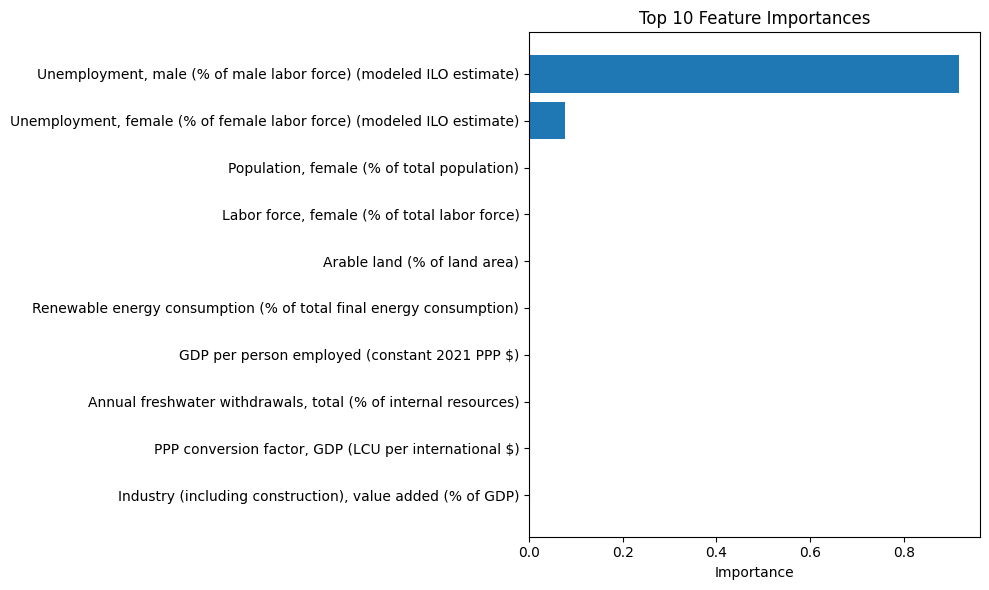

In [ ]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


# **Heatmap: Correlation of selected indicators**

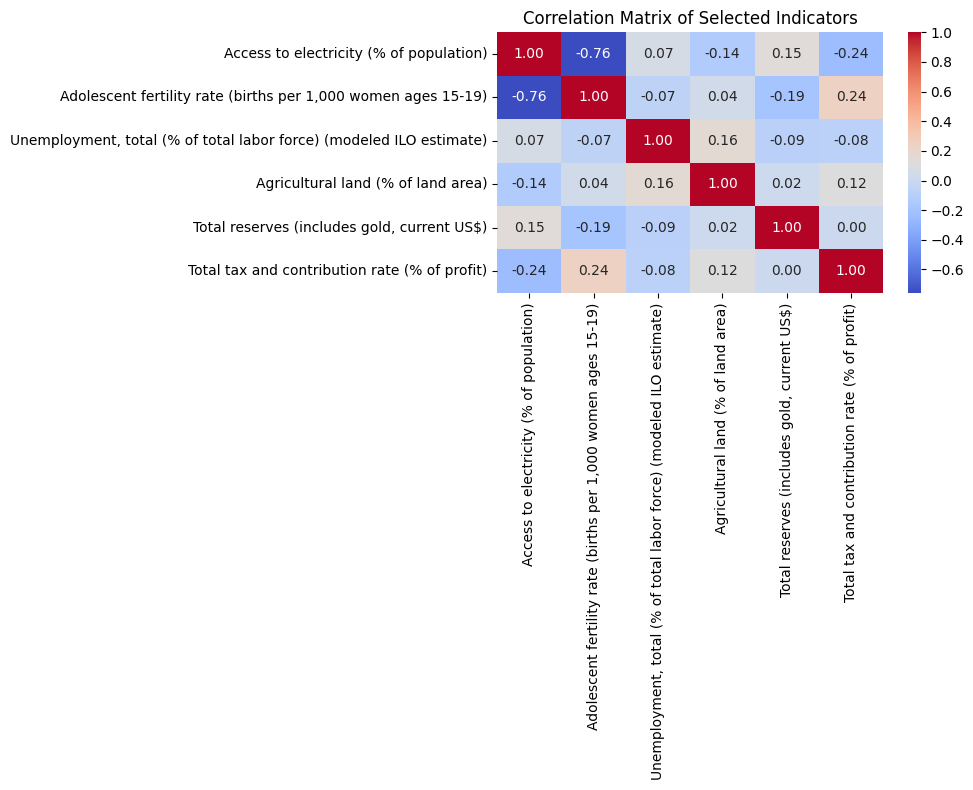

In [ ]:
# 1. Heatmap: Correlation of selected indicators
selected_columns = [
    'Access to electricity (% of population)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Agricultural land (% of land area)',
    'Total reserves (includes gold, current US$)',
    'Total tax and contribution rate (% of profit)'
]

corr_data = df[selected_columns].dropna()
corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Indicators')
plt.tight_layout()
plt.show()

# **Bar Plot: Unemployment Rate Comparison (Latest Year)**

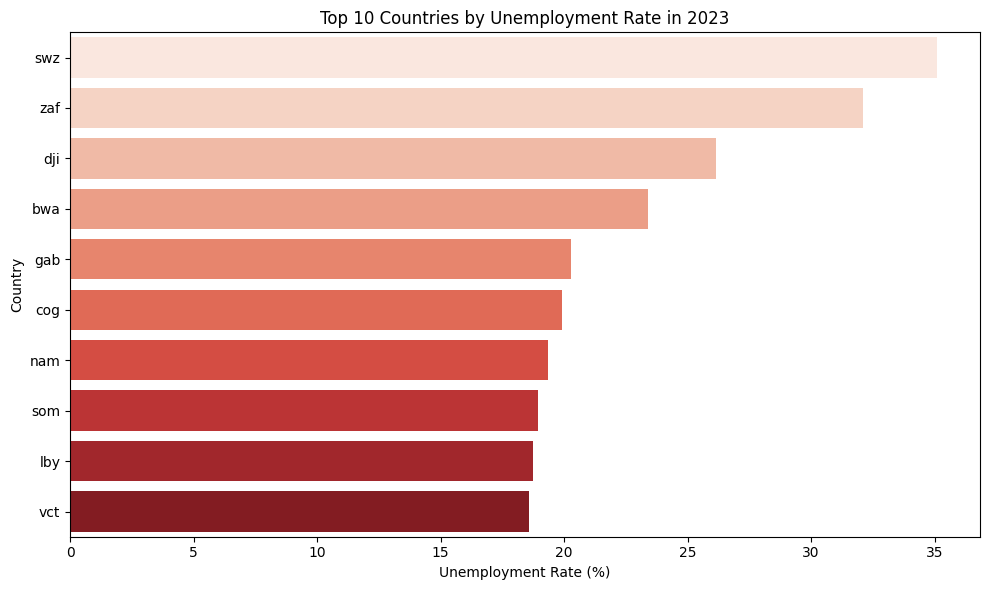

In [ ]:
# 2. Bar Plot: Unemployment Rate Comparison (Latest Year)
latest_year = df['year'].max()
unemployment_df = df[df['year'] == latest_year][['country', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']]
top_unemployment = unemployment_df.sort_values(by='Unemployment, total (% of total labor force) (modeled ILO estimate)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_unemployment, x='Unemployment, total (% of total labor force) (modeled ILO estimate)', y='country', palette='Reds')
plt.title(f'Top 10 Countries by Unemployment Rate in {latest_year}')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()